In [122]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
import seaborn as sns
import xgboost as xgb
import multiprocessing
from gensim.models import FastText
from sklearn import preprocessing
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [123]:
path='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\'
df=pd.read_csv(path + 'Dataset\\3.csv')

In [124]:
df

,Unnamed: 0,caption,following,likes,posts_count,followers,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,0,possible thanks lateral flow testing fast simp...,964.0,14.0,47.0,1093.0,0,1,0,0,...,0,0.632390,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10
1,1,grateful kind words feedback receiving since s...,964.0,12.0,47.0,1093.0,0,1,0,0,...,0,0.405556,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2
2,2,hand dived isle jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,0,0,0,0,...,0,0.000000,0.000000,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0
3,3,jerusalem artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,0,0,0,0,...,0,0.333333,0.250000,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0
4,4,main course seasonal 7 course menu borders roe...,308.0,146.0,343.0,4202.0,0,0,0,0,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,alongside hospitality performing arts also mas...,599.0,4079.0,1933.0,167394.0,0,0,0,0,...,0,0.506629,0.428030,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0
41737,41737,isnt looking forward waking beautiful nights s...,599.0,1621.0,1933.0,167394.0,0,0,0,0,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1
41738,41738,missing london town heres shot really showcase...,599.0,1548.0,1933.0,167394.0,0,0,0,0,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0
41739,41739,closed going try keep happy inspired mix beaut...,599.0,2637.0,1933.0,167394.0,0,0,0,0,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0


In [125]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [126]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextSkipGramCaption = FastText(tokenized_caption, 
                     size=200, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=1  # 1 for Skipgram model
                     )

modelFastTextSkipGramCaption.build_vocab(tokenized_caption, update=True)
modelFastTextSkipGramCaption.train(tokenized_caption, total_examples= len(tokenized_caption), epochs=20)

In [127]:
modelFastTextSkipGramCaption.wv.most_similar("Gastroenteritis")

[('gastroenterology', 0.8170456290245056),
 ('gastroenterologist', 0.8149886131286621),
 ('gastroenterologists', 0.7874488830566406),
 ('urologist', 0.6097856760025024),
 ('gastro', 0.6069313287734985),
 ('urology', 0.6034332513809204),
 ('urologists', 0.5817819833755493),
 ('ophthalmologist', 0.5736432075500488),
 ('gynaecologist', 0.5668860077857971),
 ('neurologist', 0.5661766529083252)]

In [128]:
modelFastTextSkipGramCaption.wv.most_similar("pizza")

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


[('pizzazz', 0.9101979732513428),
 ('pizzaioli', 0.8293857574462891),
 ('prepizza', 0.7991644144058228),
 ('pizzavegan', 0.7940000295639038),
 ('pizzas', 0.7728723287582397),
 ('atpizzatogo', 0.7288715839385986),
 ('pizzathemed', 0.7180628776550293),
 ('pizzapoints', 0.6957135200500488),
 ('pizzette', 0.6850453615188599),
 ('pizzerias', 0.649911105632782)]

In [129]:
modelFastTextSkipGramCaption.save(path+ "Save Models\\200_fastText_Skipgram_Caption.model")

In [130]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [131]:
wordvec_arrays = np.zeros((len(tokenized_caption), 200)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 200,modelFastTextSkipGramCaption)
wordvec_caption = pd.DataFrame(wordvec_arrays)
wordvec_caption.shape

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(41741, 200)

In [132]:
wordvec_caption.shape

(41741, 200)

## Hashtags

In [133]:
# tokenized_hastags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
# modelFastTextSkipGramHastags = FastText(tokenized_hastags, 
#                      size=200, # desired no. of features/independent variables
#                      window=2,  # context window size
#                      min_count=2, # Ignores all words with total frequency lower than 2.  
#                      workers=32, # no.of cores
#                      hs = 0,
#                      negative = 10, # for negative sampling
#                      sg=1  # 1 for Skipgram model
#                      )

# modelFastTextSkipGramHastags.build_vocab(tokenized_hastags, update=True)
# modelFastTextSkipGramHastags.train(tokenized_hastags, total_examples= len(tokenized_hastags), epochs=20)

In [134]:
# modelFastTextSkipGramHastags.wv.most_similar("Gastroenteritis")

In [135]:
# modelFastTextSkipGramHastags.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [136]:
# wordvec_arrays = np.zeros((len(tokenized_hastags), 200)) 
# for i in range(len(tokenized_hastags)):
#     wordvec_arrays[i,:] = word_vector(tokenized_hastags[i], 200,modelFastTextSkipGramHastags)
# wordvec_Hashtag = pd.DataFrame(wordvec_arrays)
# wordvec_Hashtag.shape

## mentions

In [137]:
# tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing
# modelFastTextSkipGramMentions = FastText(tokenized_hastags, 
#                      size=200, # desired no. of features/independent variables
#                      window=2,  # context window size
#                      min_count=2, # Ignores all words with total frequency lower than 2.  
#                      workers=32, # no.of cores
#                      hs = 0,
#                      negative = 10, # for negative sampling
#                      sg=1  # 1 for Skipgram model
#                      )

# modelFastTextSkipGramMentions.build_vocab(tokenized_hastags, update=True)
# modelFastTextSkipGramMentions.train(tokenized_hastags, total_examples= len(tokenized_hastags), epochs=20)

In [138]:
# modelFastTextSkipGramMentions.wv.most_similar("Gastroenteritis")

In [139]:
# modelFastTextSkipGramMentions.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [140]:
# wordvec_arrays = np.zeros((len(tokenized_hastags), 200)) 
# for i in range(len(tokenized_hastags)):
#     wordvec_arrays[i,:] = word_vector(tokenized_hastags[i], 200,modelFastTextSkipGramMentions)
# wordvec_Mentions = pd.DataFrame(wordvec_arrays)
# wordvec_Mentions.shape

In [141]:
fastText_Df = pd.DataFrame(np.hstack((wordvec_caption, df)))

In [149]:
fastText_Df[200]

0        possible thanks lateral flow testing fast simp...
1        grateful kind words feedback receiving since s...
2        hand dived isle jura scallop smoked roe leek c...
3        jerusalem artichoke prepared first dessert mal...
4        main course seasonal 7 course menu borders roe...
                               ...                        
41736    alongside hospitality performing arts also mas...
41737    isnt looking forward waking beautiful nights s...
41738    missing london town heres shot really showcase...
41739    closed going try keep happy inspired mix beaut...
41740    today last day traditionally take decorations ...
Name: 200, Length: 41741, dtype: object

In [150]:
dropped = [200,223,225,227,228]
fastText_df = fastText_Df.drop(dropped,axis=1)
fastText_df

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,224,226,229
0,0.131865,-0.596692,0.287073,0.266942,-0.0175877,0.0040059,0.0977732,0.0780996,-0.0135414,0.016243,...,0,0,0,0,0,0.63239,0.282576,8,0,10
1,0.0518519,-0.467074,0.23243,0.257588,0.0490115,0.0196131,0.0211482,-0.00777846,-0.0351248,0.0452575,...,0,1,0,0,0,0.405556,0.168056,9,0,2
2,0.0843224,-0.233756,0.321473,-0.0674081,0.389917,-0.0841292,0.0235991,0.247107,0.0596656,0.363291,...,0,0,0,1,0,0,0,25,0,0
3,-0.0955412,-0.17498,0.332965,-0.0268839,0.267468,0.29114,0.0511178,0.0871391,-0.261718,0.109728,...,0,0,0,0,0,0.333333,0.25,28,0,0
4,-0.0759151,-0.4378,0.390664,0.19921,0.13888,0.233625,0.119769,0.293252,-0.0509197,0.332234,...,1,0,0,0,0,0.333333,0.166667,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.04868,-0.359007,0.268623,0.0916179,0.10023,0.0952364,0.058855,-0.164529,-0.096529,0.0765949,...,0,0,1,0,0,0.506629,0.42803,6,4,0
41737,0.0907208,-0.275053,0.27184,0.230289,0.1643,0.0245694,-0.0711438,0.103258,-0.0662368,0.0386291,...,1,0,0,0,0,0.416667,0.491667,7,1,1
41738,-0.0107758,-0.293319,0.256294,0.176024,0.184101,-0.00239103,0.0551932,0.0103808,-0.150485,0.0407049,...,0,0,0,0,0,0.510417,0.260417,8,1,0
41739,0.032576,-0.352754,0.293301,0.106599,0.210344,-0.0532037,-0.0354004,-0.0117985,-0.15215,-0.0520108,...,1,0,0,0,0,0.708333,0.445833,7,0,0


In [151]:
fastText_df.to_csv(path+ 'fastText.csv')

In [104]:
FastText_df = pd.DataFrame(fastText_df)
data=FastText_df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
fastText_df_final = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [152]:
y=fastText_df_final.iloc[ :, -1:]  #Target Variable          
X=fastText_df_final.iloc[: , :-1]  #Feature Matrix 

X=pd.DataFrame(X)
y=pd.DataFrame(y)
for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train_fastText_df, x_test_fasttext_df, y_train_fastText_df, y_test_fasttext_df = train_test_split(X, y, test_size=0.2,random_state=2022)

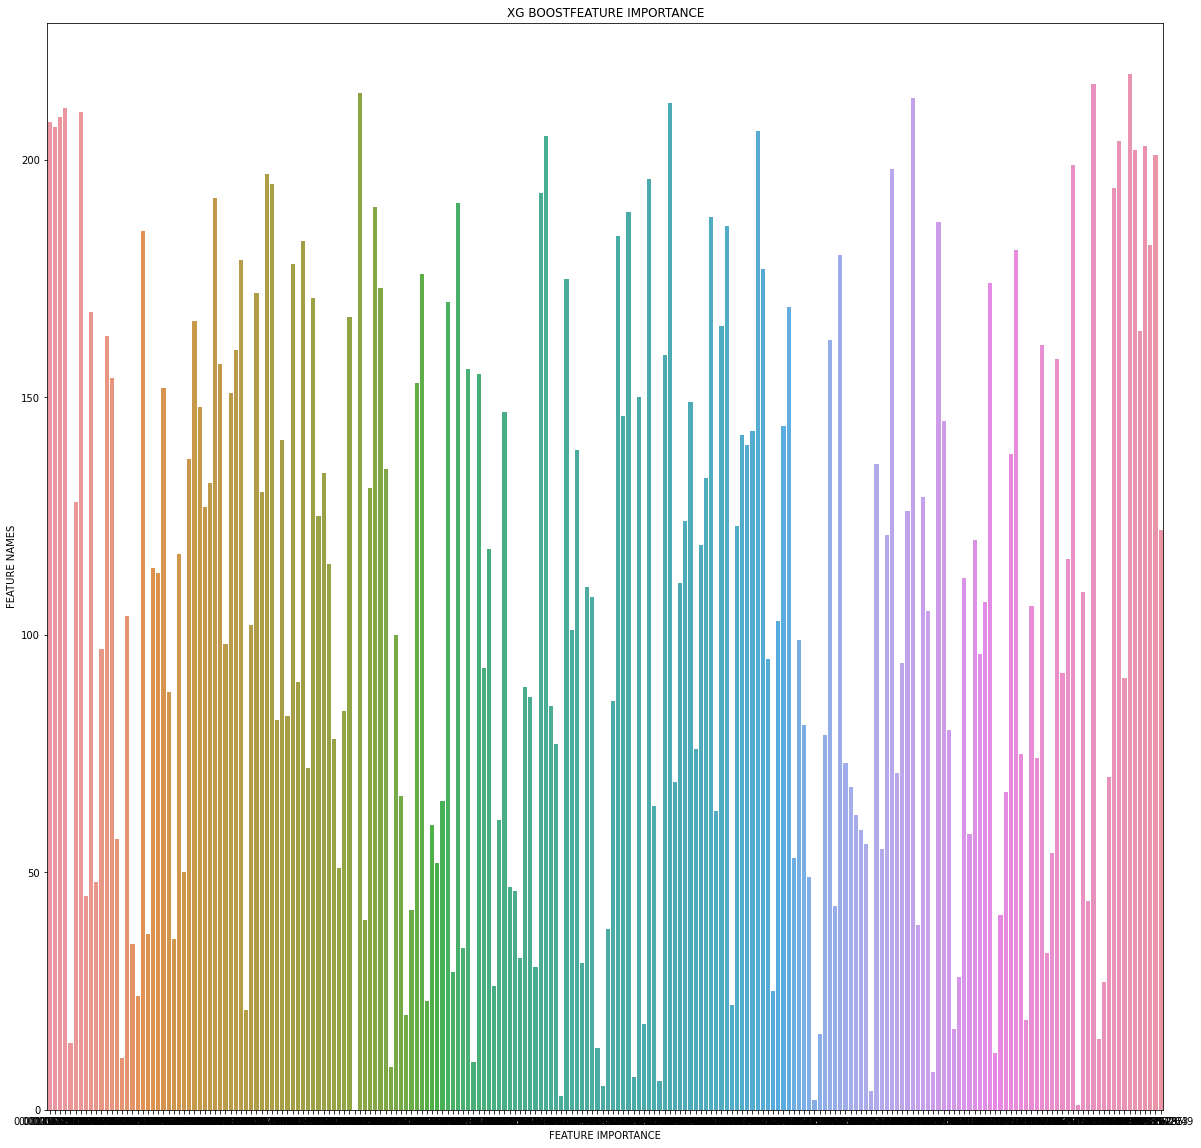

In [153]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_fastText_df, y_train_fastText_df)
y_pred = xg_reg.predict(x_test_fasttext_df)
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_fastText_df.columns,'XG BOOST')

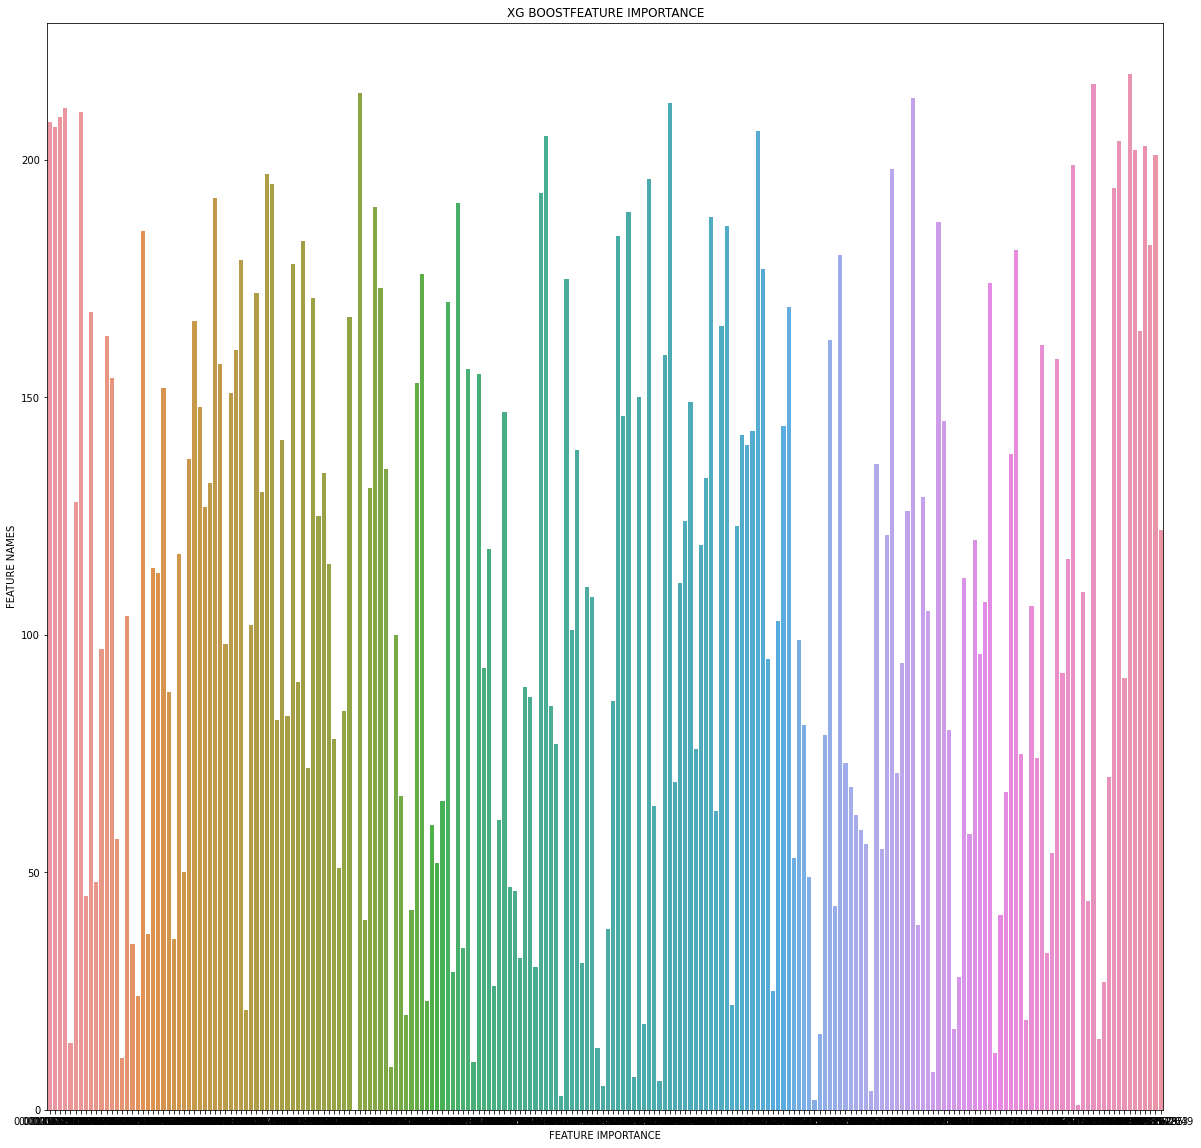

In [157]:
# utils.plot_feature_importance(xg_reg.feature_importances_,x_train_fastText_df.columns,'XG BOOST')

In [154]:
utils.metrics(y_test_fasttext_df,y_pred)

RMSE: 0.043268

R2 Score: 0.315582

MAE : 0.026222

MSE : 0.001872

RMSLE : -3.140350

max_error : 0.837386



C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.049225

R2 Score: 0.114125

MAE : 0.031296

MSE : 0.002423

RMSLE : -3.011346

max_error : 0.821861



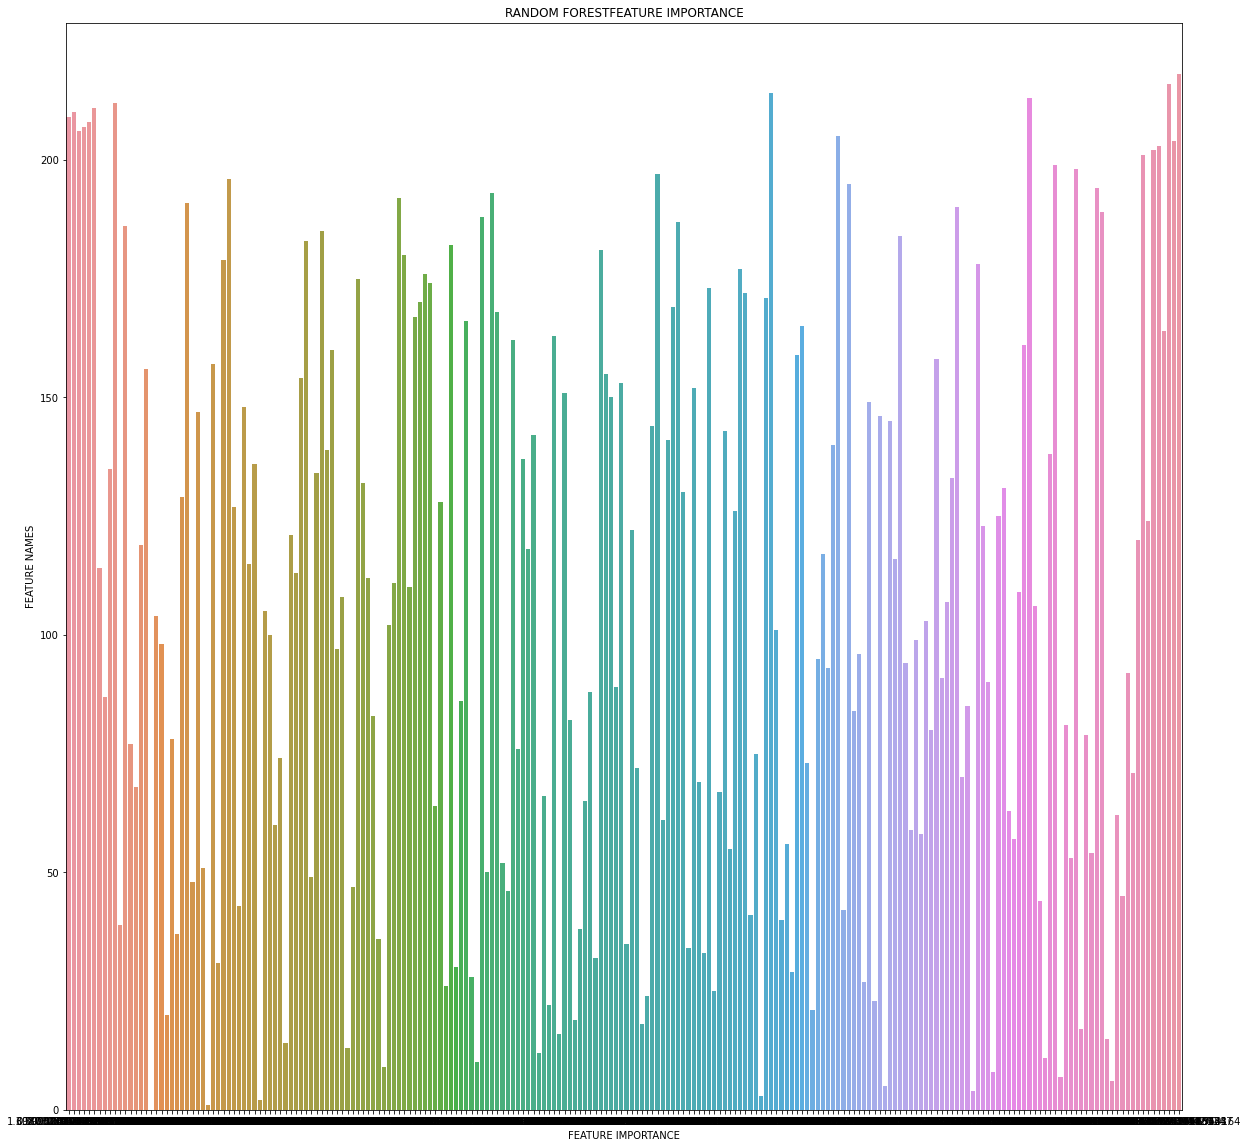

In [155]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_df = rnd_clf.predict(x_test_fasttext_df)
utils.metrics(y_test_fasttext_df,y_pred_fastText_df)
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_fastText_df.columns,'RANDOM FOREST')

In [156]:
utils.metrics(y_test_fasttext_df,y_pred_fastText_df)

RMSE: 0.049225

R2 Score: 0.114125

MAE : 0.031296

MSE : 0.002423

RMSLE : -3.011346

max_error : 0.821861

